In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
%%html
<style> 
th{
    font-size: 20px;
    font-weight: bold;
}

td{
    font-size: 18px;
}
</style>

# Introduction aux filtres Butterworth analogiques

## But de ce document

Ce document est une introduction aux filtres de Butterworth analogiques. Les filtres de Butterworth sont une classe de filtres analogiques, qui ont des caractéristiques intéressantes pour approximer la réponse en fréquence (fonction de transfert harmonique) des filtres idéaux. Un filtre idéal n’est pas réalisable en pratique, d’où la nécessité de définir des structures de filtres réalisables qui approchent les caractéristiques des filtres idéaux. Les approximations de filtre idéal les plus fréquemment rencontrées sont celles de Butterworth et de Chebyshev, dont les réponses en fréquences d’amplitude s’approchent de celle d’un filtre idéal, et celle de Bessel, dont c’est la réponse en fréquences de phase qui s’approche de celle d’un filtre idéal qui est linéaire.  Nous allons présenter ici les filtres de Butterworth.

## Le filtre idéal

Un filtre idéal est un filtre qui a des caractéristiques « parfaites » dans les bandes de fréquence d’intérêt. Par exemple, un filtre passe-bas idéal a un gain exactement égal à 1 (0 dB) dans sa bande passante, un gain exactement 0 ($-\infty$ dB) dans sa bande coupée, et une bande de transition de largeur nulle, i.e. que l’on passe de la bande passante à la bande coupée d’un seul coup, sans passer par des gains intermédiaires. De plus, un filtre idéal a une caractéristique de phase linéaire, ce qui n’est jamais exactement le cas pour un filtre réalisable.

## Filtre passe-bas normalisé de type Butterworth

Pour un filtre de Butterworth d’ordre $n$ normalisé à une fréquence de coupure de $\omega_c = 1$ rad/sec, le module de sa fonction de transfert harmonique est donné par

$$
|H(j\omega)| = \frac{1}{\sqrt{1+\omega^{2n}}}
$$

La figure suivante montre le module de $H(j\omega)$ pour $n = 1$ et $n=10$. On montre aussi, en pointillé, le module de la fonction de transfert du filtre passe-bas normalisé idéal. Ces courbes nous permettent de sélectionner l’ordre n requis du filtre Butterworth pour une application donnée.

Text(1.1, 0.4, 'n=10')

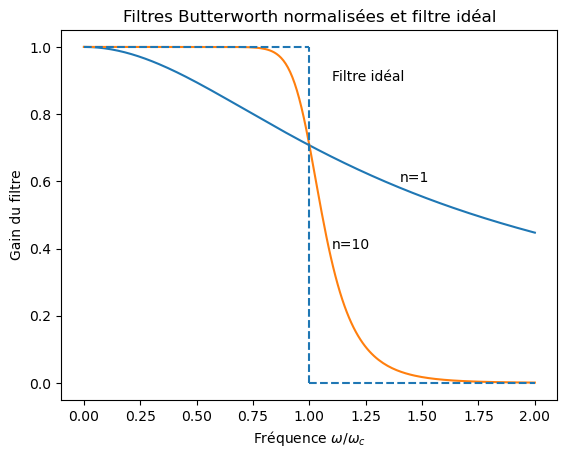

In [3]:
w = np.linspace(0,2,200)
n1 = 1 
n10 = 10

H1 = 1/np.sqrt(1+w**(2*n1))
H10 = 1/np.sqrt(1+w**(2*n10))

fig = plt.figure()
plt.plot(w, H1)
plt.plot(w, H10)
plt.vlines(1, 0, 1, linestyle='dashed')
plt.hlines(1, 0, 1, linestyle='dashed')
plt.hlines(0, 1, 2, linestyle='dashed')
plt.title("Filtres Butterworth normalisées et filtre idéal")
plt.xlabel("Fréquence $\omega / \omega_c$")
plt.ylabel("Gain du filtre")

plt.text(1.1, 0.9, 'Filtre idéal')
plt.text(1.4, 0.6, 'n=1')
plt.text(1.1, 0.4, 'n=10')

On remarque que plus l’ordre n du filtre augmente, meilleure est l’approximation du filtre idéal. On observe aussi que le gain du filtre passe par la valeur 0.707 (-3 dB) à la fréquence de coupure $\omega_c$ (pour un filtre normalisé, $\omega_c = 1$), peu importe l’ordre $n$ du filtre.

Notez aussi la caractéristique particulière de la forme de l’amplitude de ce filtre, qui décroît de façon monotone à mesure que la fréquence augmente. Cette caractéristique, spécifique aux filtres Butterworth, est appelée en anglais « *maximally flat* ». D’autres types de filtres, comme les filtres de Chebyshev, ne présentent pas cette caractéristique (on retrouve des oscillations dans le module de leur réponse en fréquences).

Le gain du filtre en fonction de la fréquence n’est pas la seule information qui le caractérise. On peut également tracer sa réponse de fréquences en phase (phase de sa fonction de transfert harmonique). Sans donner ici la forme mathématique de cette phase, on la trace dans les deux figures suivantes pour les ordres 1 et 10 du filtre de Butterworth normalisé. Si la phase était parfaitement linéaire, on observerait une droite, ce qui n’est pas le cas ici. (Notez que la phase du filtre d’ordre 10 fait plus d’un tour de 360 degrés.)


(0.0, 2.0, -800.0, 0.0)

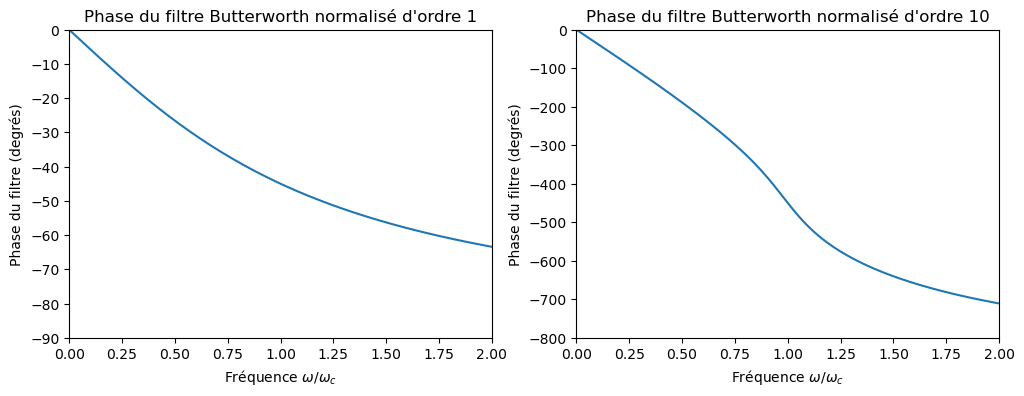

In [4]:
B1, A1 = signal.butter(n1, 1, analog=True)
B10, A10 = signal.butter(n10, 1, analog=True)

w1, h1 = signal.freqs(B1, A1, worN=w)
w10, h10 = signal.freqs(B10, A10, worN=w)

fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(4)

ax1 = plt.subplot(1, 2, 1)
ax1.plot(w1, 180*np.angle(h1)/np.pi)

ax2 = plt.subplot(1, 2, 2)
ax2.plot(w10, 180*np.unwrap(np.angle(h10))/np.pi)

ax1.set_title("Phase du filtre Butterworth normalisé d'ordre 1")
ax1.set_xlabel("Fréquence $\omega / \omega_c$")
ax1.set_ylabel("Phase du filtre (degrés)")
ax1.axis([0, 2, -90, 0])

ax2.set_title("Phase du filtre Butterworth normalisé d'ordre 10")
ax2.set_xlabel("Fréquence $\omega / \omega_c$")
ax2.set_ylabel("Phase du filtre (degrés)")
ax2.axis([0, 2, -800, 0])

## Délai de phase et délai de groupe

On peut tenter de ramener l’information de phase du filtre à une information de décalage temporel, ou retard. En effet, le déphasage indique de combien de radians une sinusoïde en entrée sera décalée à la sortie du filtre. Or, pourquoi ne pas poser la question en termes de retard, autrement dit de combien de secondes (ou millisecondes) sera retardée une sinusoïde qui passe à travers le filtre. Ceci donne le délai de phase. 

Le délai de phase est défini simplement comme :

$$
D_p = - \frac{\phi(\omega)}{\omega}
$$

i.e. le rapport (avec un signe moins) entre le déphasage du filtre et la fréquence. Ceci se comprend aisément. Si une sinusoïde de fréquence $\omega$ est retardée de $\phi(\omega)$ radians (le déphasage dépend de la fréquence), alors elle est retardée d’une fraction de période égale à $\phi(\omega)/2\pi$. Si la période est $T$, alors le retard, en secondes, est égal à la fraction de période fois la période, i.e. à $T  \phi(\omega)/2\pi$. Or, $T = (2\pi)/\omega$, de sorte que le retard est $\phi(\omega)/\omega)$. Le signe moins indique qu’un décalage négatif (un retard) sera exprimé comme une valeur positive. 

On comprend maintenant mieux l’importance d’avoir une caractéristique de phase linéaire. Si la phase $\phi(\omega)$ augmente (ou diminue) linéairement avec la fréquence  $\omega$, cela signifie que chaque composante sinusoïdale subit le même retard temporel $D_p$ en passant à travers le filtre, donc que le signal d’entrée ne subit, sur le plan des phases, qu’un retard pur. Au contraire, si la phase n’augmente pas de façon linéaire avec la fréquence, les composantes fréquentielles du signal d’entrée ne subissent pas le même retard, ce qui va modifier la forme du signal en sortie.

Lorsque le filtre n’a pas une phase linéaire, on peut mesurer de combien sa caractéristique de phase s’en éloigne en mesurant (ou en calculant) son délai de groupe. Le délai de groupe se définit comme suit :

<div class="alert alert-block alert-info">
Délai de groupe
$$
D = -\frac{d\phi(\omega)}{d\omega}
$$
</div>

Notez bien le signe « - » dans cette définition. Ici, $\phi(\omega)$ est la phase de la fonction de transfert harmonique $H(j\omega)$ du filtre. Puisque $\phi(\omega)$ est en radians et $\omega$ est en radians par seconde, les unités du délai de groupe $D$ sont bien des secondes ; $D$ exprime bien un retard.

Notez que pour un filtre idéal, dont une des caractéristiques est d’avoir une phase linéaire, le délai de groupe est une constante (pente, avec un signe moins, de la caractéristique de phase). On va donc qualifier un filtre réalisable en observant de combien son délai de groupe se distingue d’une constante. Les spécifications diront, par exemple, que le délai de groupe du filtre ne doit pas s’écarter d’une valeur constante de plus de $\pm d$, où $d$ est en secondes (ou en millisecondes, ou en microsecondes, etc.) ou encore en %.

Pour donner un exemple, on montre ci-dessous le délai de groupe d’un filtre de Butterworth passe-bas normalisé d’ordre 1. On a calculé cette courbe en prenant la dérivée, en fonction de $\omega$, de la phase du filtre. Dans la cas présent, le délai de groupe est important (il se compte en seconde) puisque la fréquence de coupure du filtre est très basse (filtre normalisé ), ce qui rend très grande la pente de la caractéristique de phase du filtre. Pour des filtres plus « raisonnables », i.e. de fréquence de coupure plus élevée, le délai de groupe se mesure en millisecondes ou en microsecondes.

Dans Python, pour calculer le délai de groupe, on suggère d’utiliser la fonction `diff` pour approximer l’élément différentiel. Ainsi, si `P` est la phase (en **radians**), et `W` est la fréquence (en radians par seconde), on calcule le délai de groupe comme suit (`P` et `W` sont des vecteurs dans Python):

```
D = -np.diff(P1)/np.diff(w1)
```


Text(0, 0.5, 'Délai de groupe (seconde)')

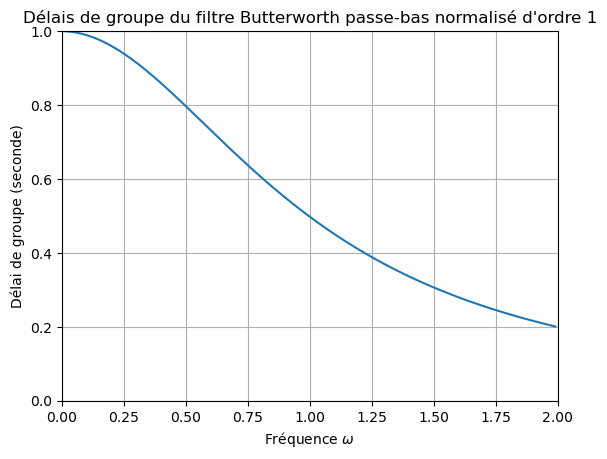

In [5]:
P1 = np.angle(h1)
D = -np.diff(P1)/np.diff(w1)

plt.figure()
plt.plot(w1[:-1], D)
plt.axis([0, 2, 0, 1])
plt.grid()
plt.title("Délais de groupe du filtre Butterworth passe-bas normalisé d'ordre 1")
plt.xlabel("Fréquence $\omega$")
plt.ylabel("Délai de groupe (seconde)")

## Fonction de transfert d’un filtre de Butterworth

L'équation 

$$
|H(j\omega)| = \frac{1}{\sqrt{1+\omega^{2n}}}
$$

le module de la fonction de transfert harmonique $H(j\omega)$ d’un filtre de Butterworth passe-bas normalisé. Cependant, pour faire la conception d’un filtre de Butterworth, il n’est pas suffisant de connaître le module de sa fonction de transfert harmonique, il faut connaître sa fonction de transfert $H(s)$ dans le domaine de Laplace. Voici comment la construire.

La forme générale de la fonction de transfert est la suivante, où $N$ est l’ordre du filtre :

$$
H(s) = \frac{1}{1+a_1s + a_2 s^2 + ... + a_N s^N}
$$

On consulte ensuite une table appropriée (reproduite ci-dessous pour les ordres $N=1$ à $N=6$). 

|N|a1|a2|a3|a4|a5|a6|
|---|---|---|---|---|---|---|
|1|1.0000|  |  |  |  |  |
|2|1.4141|1.0000  |  |  |  |  |
|3|2.0000|2.0000  | 1.0000 |  |  |  |
|4|2.6131| 3.4142 | 2.6131 | 1.0000 |  |  |
|5|3.2361| 5.2361 | 5.2361 | 3.2361 | 1.0000 |  |
|6|3.8637| 7.4641 | 9.1416 | 7.4641 | 3.8637 | 1.0000 |

Par exemple, voici les fonctions de transfert (Laplace) des filtres Butterworth passe-bas normalisés d’ordre 1 et d’ordre 2 :

$$
\mathrm{Ordre~1} : H(s) = \frac{1}{s+1}
$$

$$
\mathrm{Ordre~2} : H(s) = \frac{1}{s^2+1.4141s+1}
$$

Vérifiez avec Python que les modules de ces fonctions de transfert correspondent bien à une caractéristique de Butterworth. Par exemple, le code Python pour vérifier le module du filtre d’ordre 1 est montré ici (on a choisit de montrer la fréquence $\omega$ entre 0 et 2):

```
import numpy as np
import matplotlib.pyplot as plt

w = np.linspace(0, 2, 2000)
s = 1j*w
H = 1/(s+1)

plt.figure()
plt.plot(w, np.abs(H))
plt.axis([0, 2, 0, 1])
```

On peut aussi vérifier le délai de groupe de ce filtre (Butterworth passe-bas normalisé d’ordre 1) comme suit avec Python :

```
P = np.angle(H)
D = -np.diff(P) / np.diff(w)
plt.figure()
plt.plot(w[1:], D)
plt.axis([0, 2, 0, 1])
plt.grid()
```

On obtiendra alors la figure du délais de groupe montré précedemment. (Notez qu’à l’affichage, on doit prendre un élément de moins du vecteur `w` – ceci est dû au fait que la fonction `np.diff` retourne 1 élément de moins que la taille des vecteurs, puisqu’elle calcule les différences entre deux éléments successifs).

Notez qu’à l’ordre 2, la fonction de transfert d’un filtre passe-bas s’écrit de façon générale comme suit :

$$
H(s) = \frac{K\omega_0^2}{s^2 + \left(\frac{\omega_0}{Q} \right) s + \omega_0^2}
$$

où $K$ est le gain du filtre à la DC (quand $s = 0$),   est sa fréquence de coupure (en rad/sec) et $Q$ est le facteur de qualité du filtre (tel que défini à l’unité 2 de la session S2). Ces 3 paramètres ($K$, $\omega_0$ et $Q$) vont définir les fonctions de transfert des filtres passe-bas, passe-haut et passe-bande du 2e ordre. 

Ainsi, pour la fonction de transfert d'un filtre de Butterworth d’ordre 2, on a :

$$
\begin{aligned}
& \omega_0=1 \quad \text { (filtre normalisé) } \\
& K \equiv 1 \\
& Q \equiv 1 / 1.414=0.707
\end{aligned}
$$

<div class="alert alert-block alert-warning">
<b>Cette valeur spécifique du facteur de qualité est propre au filtre Butterworth passe-bas d’ordre 2.</b> 
</div>

On pourrait aussi écrire en fonction de $K$, $\omega_0$ et $Q$ les fonctions de transfert d’ordre 2 de filtres passe-haut et passe-bande. 

Pour le passe-haut, cela donne :
$$
H(s) = \frac{Ks^2}{s^2 + \left(\frac{\omega_0}{Q} \right) s + \omega_0^2}
$$

et pour le passe-bande :

$$
H(s) = \frac{K\left(\frac{\omega_0}{Q} \right) s }{s^2 + \left(\frac{\omega_0}{Q} \right) s + \omega_0^2}
$$

## Dénormalisation des filtres

La fonction de transfert des filtres normalisés passe-bas peut servir maintenant à définir les fonctions de transfert des filtres à réaliser, que ce soit des filtres passe-bas, passe-haut, passe-bande et même coupe-bande. Pour ce faire, on applique une dénormalisation qui s’opère par un changement de variable. On va voir ici le cas particulier des filtres passe-bas et passe-haut.

Les changements de variables à effectuer sont les suivants.

### Filtre passe-bas

Pour obtenir la fonction de transfert $H_{PB}(s)$ d’un filtre Butterworth passe-bas d’ordre $N$ et de fréquence de courpure $\omega_c$, on fait le changement de variable suivant sur la variable $s$ dans la fonction de transfert passe-bas normalisée $H(s)$ :

$$
s \quad \rightarrow \quad \frac{s}{\omega_c}
$$

### Filtre passe-haut

Pour obtenir la fonction de transfert $H_{PH}(s)$ d’un filtre Butterworth passe-haut d’ordre $N$ et de fréquence de courpure $\omega_c$, on fait le changement de variable suivant sur la variable s dans la fonction de transfert passe-bas normalisée $H(s)$ :

$$
s \quad \rightarrow \quad \frac{\omega_c}{s}
$$

Nous allons faire 2 exemples pour illustrer la méthode.

### Exemple 1

Déterminez la fonction de transfert $H_{PB}(s)$ d’un filtre passe-bas Butterworth d’ordre 1, de fréquence de coupure $\omega_c = 1000$ radians par seconde. Tracez ensuite, avec Python, le module de $H_{PB}(j\omega)$ de même que le délai de groupe de ce filtre.

Solution :

La fonction de transfert du filtre passe-bas normalisé est :

$$
H(s) = \frac{1}{s+1}
$$

On a donc

$$
H_{P B}(s)=\left.\frac{1}{s+1}\right|_{s \rightarrow s / 1000}=\frac{1}{(s / 1000)+1}=\frac{1000}{s+1000}
$$


Le code Python pour afficher le module, la phase et le délai de groupe de ce filtre, pour $\omega$ entre 1 et 10000, est donné ci-dessous, avec les figures obtenues. Notez qu’on utilise une échelle logarithmique pour la fréquence, et qu’on affiche le module en dB.

```
import numpy as np
import matplotlib.pyplot as plt

w = np.linspace(1, 10000, 10000)
s = 1j * w
H = 1000 / (s+1000)

A = np.abs(H)
P = np.angle(H)
D = - np.diff(P) / np.diff(w)

plt.figure()
plt.semilogx(w, 20*np.log10(A))
plt.grid()

plt.figure()
plt.semilogx(w, P)
plt.grid()

plt.figure()
plt.semilogx(w[1:], 1000*D)
plt.grid()
```

Text(0, 0.5, 'Délai de group (ms)')

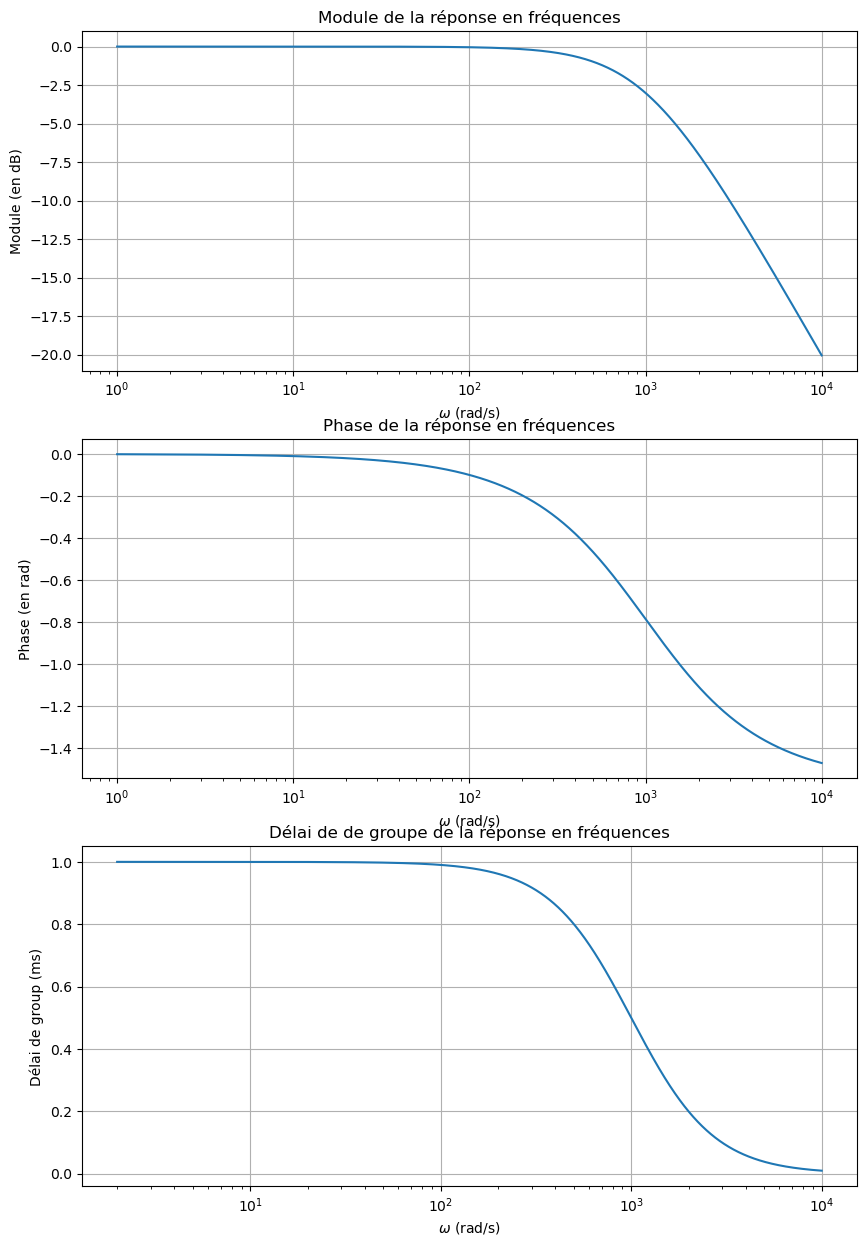

In [6]:
w = np.linspace(1, 10000, 10000)
s = 1j * w
H = 1000 / (s+1000)

A = np.abs(H)
P = np.angle(H)
D = - np.diff(P) / np.diff(w)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(15)

ax1 = plt.subplot(3, 1, 1)
ax1.semilogx(w, 20*np.log10(A))
ax1.grid()
ax1.set_title("Module de la réponse en fréquences")
ax1.set_xlabel("$\omega$ (rad/s)")
ax1.set_ylabel("Module (en dB)")

ax2 = plt.subplot(3, 1, 2)
ax2.semilogx(w, P)
ax2.grid()
ax2.set_title("Phase de la réponse en fréquences")
ax2.set_xlabel("$\omega$ (rad/s)")
ax2.set_ylabel("Phase (en rad)")

ax3 = plt.subplot(3, 1, 3)
ax3.semilogx(w[1:], 1000*D)
ax3.grid()
ax3.set_title("Délai de de groupe de la réponse en fréquences")
ax3.set_xlabel("$\omega$ (rad/s)")
ax3.set_ylabel("Délai de group (ms)")

### Exemple 2

Déterminez la fonction de transfert $H_{PH}(s)$ d’un filtre passe-haut Butterworth d’ordre 2, de fréquence de coupure $\omega_c = 5000$ radians par seconde. Tracez ensuite, avec Python, le module de $H_{PH}(j\omega)$ de même que la phase et le délai de groupe de ce filtre.

Solution :

La fonction de transfert du filtre passe-bas normalisé est

$$
H(s) = \frac{1}{s^2+1.4141s+1}
$$

On a donc

$$
H_{P H}(s)=\left.\frac{1}{s^2+1.4141 s+1}\right|_{s\rightarrow 5000 / s}=\frac{1}{(5000 / s)^2+1.4141(5000 / s)+1}
$$

En multipliant au numérateur et au dénominateur par $s^2$, on obtient la fonction de transfert suivante pour le passe-haut désiré :

$$
H_{P H}(s)=\frac{s^2}{s^2+7070 s+5000^2}
$$

Le code Python pour afficher le module, la phase et le délai de groupe de ce filtre, pour $\omega$ entre 100 et 100000, est donné ci-dessous, avec les figures obtenues. On utilise encore ici une échelle logarithmique pour la fréquence, et qu’on affiche le module en dB. On a choisit cet intervalle de fréquences (entre 100 et 100000) de façon à bien centrer dans la figure la fréquence de coupure du filtre.

```
import numpy as np
import matplotlib.pyplot as plt

w = np.linspace(100, 100000, 100000)
s = 1j * w
H = s**2 / (s**2 + 7070*s + 5000**2)

A = np.abs(H)
P = np.angle(H)
D = - np.diff(P) / np.diff(w)

plt.figure()
plt.semilogx(w, 20*np.log10(A))
plt.grid()

plt.figure()
plt.semilogx(w, P)
plt.grid()

plt.figure()
plt.semilogx(w[1:], 1000*D)
plt.grid()
```

Text(0, 0.5, 'Délai de group (ms)')

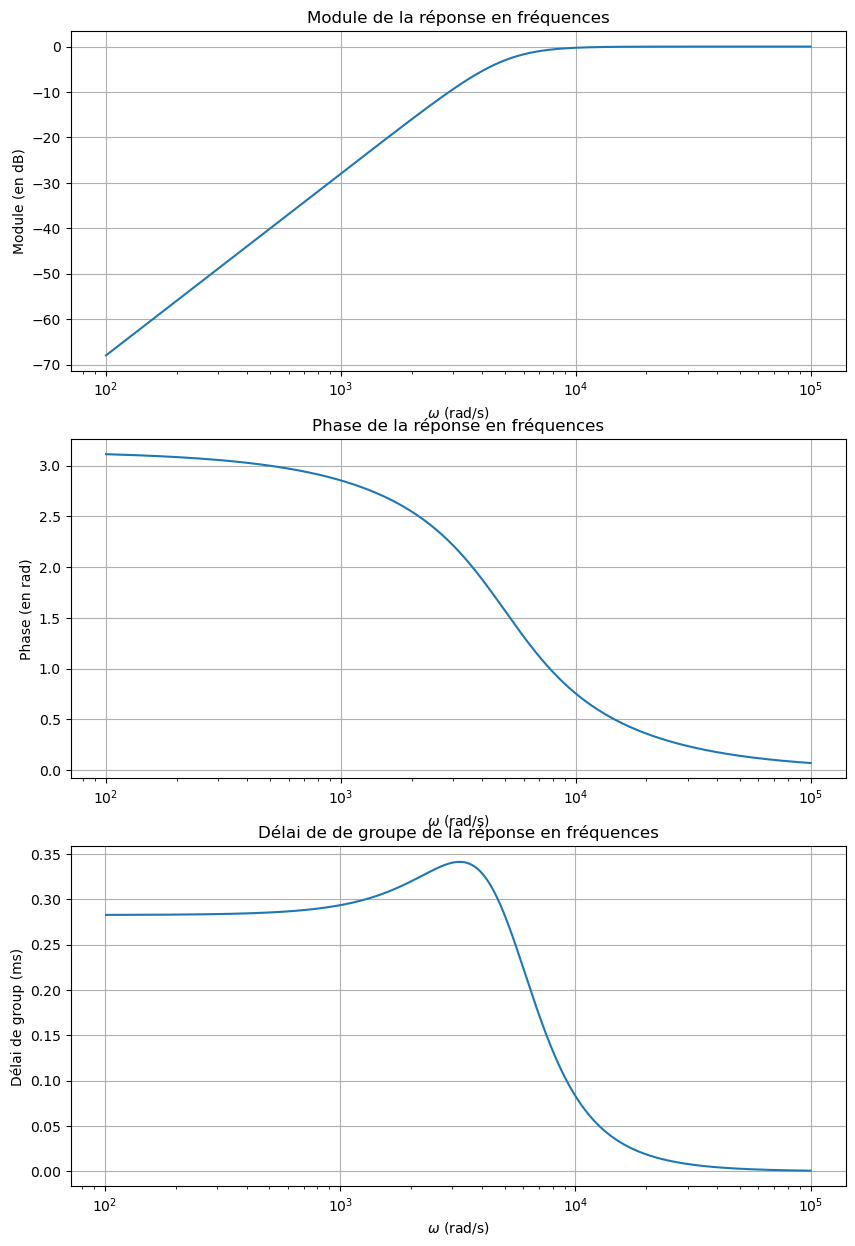

In [7]:
w = np.linspace(100, 100000, 100000)
s = 1j * w
H = s**2 / (s**2 + 7070*s + 5000**2)

A = np.abs(H)
P = np.angle(H)
D = - np.diff(P) / np.diff(w)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(15)

ax1 = plt.subplot(3, 1, 1)
ax1.semilogx(w, 20*np.log10(A))
ax1.grid()
ax1.set_title("Module de la réponse en fréquences")
ax1.set_xlabel("$\omega$ (rad/s)")
ax1.set_ylabel("Module (en dB)")

ax2 = plt.subplot(3, 1, 2)
ax2.semilogx(w, P)
ax2.grid()
ax2.set_title("Phase de la réponse en fréquences")
ax2.set_xlabel("$\omega$ (rad/s)")
ax2.set_ylabel("Phase (en rad)")

ax3 = plt.subplot(3, 1, 3)
ax3.semilogx(w[1:], 1000*D)
ax3.grid()
ax3.set_title("Délai de de groupe de la réponse en fréquences")
ax3.set_xlabel("$\omega$ (rad/s)")
ax3.set_ylabel("Délai de group (ms)")

Il ne resterait ici qu’à déterminer une structure de circuit (incluant la valeur de ses composants) qui permette de réaliser la fonction de transfert $H(s)$ calculée. 